Dataset of some sort

In [2]:
#Declaring our imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from scipy import stats
from datetime import datetime
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [3]:
# Declaring our dataset
df = pd.read_csv('2016-matric_year.csv')
df

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,440303196,3171015,DR VILJOEN CS,5.0,97.0,88.0,90.7,9.0,72.0,57.0,79.2,0,95,82,86.3
996,445203253,3171105,EMET CHRISTIAN COLLEGE,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2,100.0
997,440304210,3171017,EUNICE SS,5.0,177.0,177.0,100.0,0.0,174.0,174.0,100.0,0,164,164,100.0
998,441207293,3173006,EXCELSIOR CS,3.0,23.0,19.0,82.6,6.0,9.0,8.0,88.9,7,15,10,66.7


In [4]:
# Columns that currently exist within dataset
df.columns


Index(['emis', 'centre_no', 'name', 'quintile', 'wrote_2014', 'passed_2014',
       'perc_2014', 'progressed_2015', 'wrote_2015', 'passed_2015',
       'perc_2015', 'progressed_2016', 'wrote_2016', 'passed_2016',
       'perc_2016'],
      dtype='object')

In [5]:
# Discovering missing data
missing_values_count = df.isnull().sum()
missing_values_count[:15]

emis                0
centre_no           0
name                0
quintile            9
wrote_2014         44
passed_2014        44
perc_2014           2
progressed_2015    20
wrote_2015         20
passed_2015        20
perc_2015          20
progressed_2016     0
wrote_2016          0
passed_2016         0
perc_2016           0
dtype: int64

<AxesSubplot:>

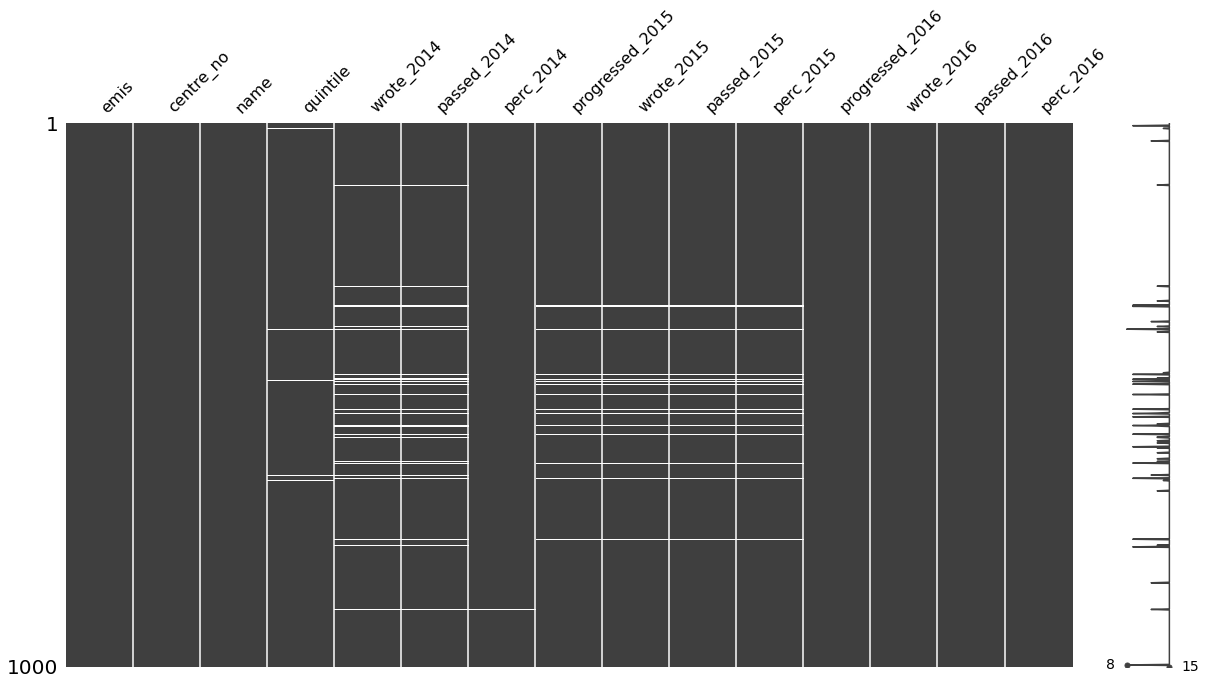

In [6]:
# # Chart to display how the data that is missing looks like
missingno.matrix(df, figsize=(20,10))

In [7]:
# performing imputation on the data that is missing.
df = df.fillna(method='bfill',axis=0).fillna(0)
#df = df.fillna(df.median().loc[:,['quintile','wrote_2014','passed_2014','perc_2014','progressed_2015','wrote_2015','passed_2015','perc_2015']])
df.head()

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
1,200300869,4161002,BETHEL COLLEGE HIGH SCHOOL,99.0,59.0,42.0,71.2,3.0,46.0,31.0,67.4,0,34,24,70.6
2,200300024,4161003,BLYTHSWOOD INSTITUTION,3.0,80.0,50.0,62.5,12.0,81.0,34.0,42.0,7,101,59,58.4
3,200300033,4161048,BONGOLETHU SENIOR SECONDARY SCHOOL,2.0,26.0,13.0,50.0,2.0,35.0,11.0,31.4,0,24,9,37.5
4,200300741,4161037,BUTTERWORTH HIGH SCHOOL,4.0,81.0,61.0,75.3,4.0,85.0,78.0,91.8,0,84,77,91.7


<AxesSubplot:>

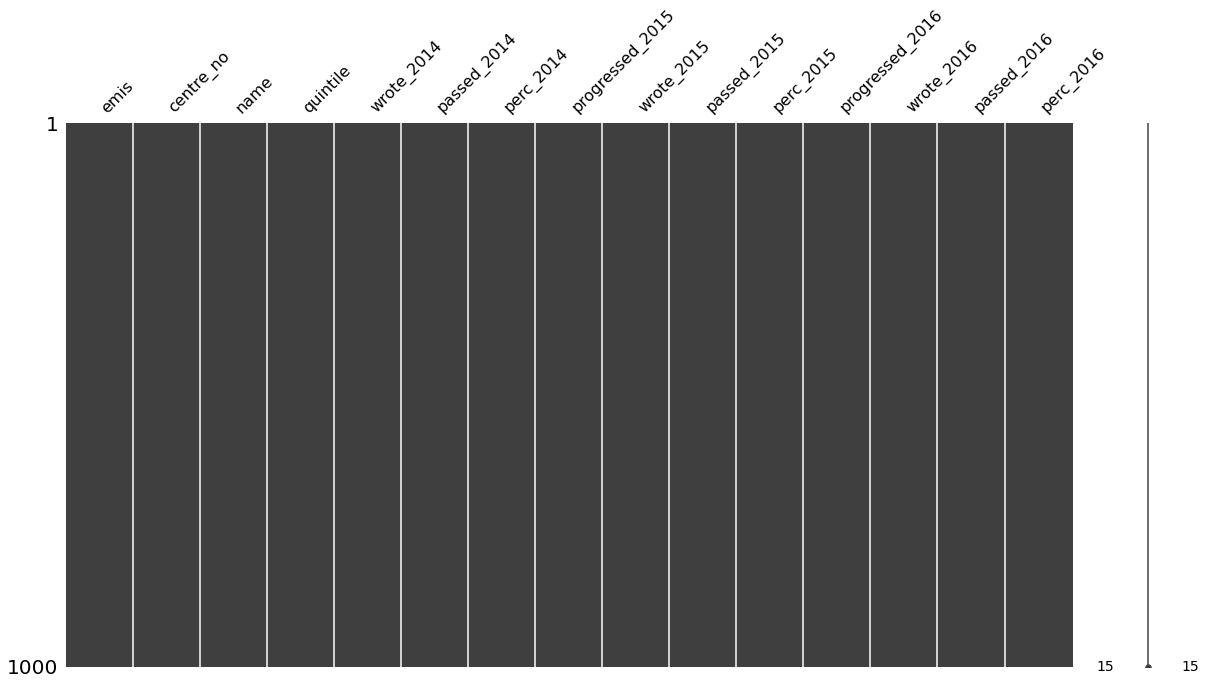

In [8]:
# Chart to display how the data looks like after imputation
missingno.matrix(df, figsize=(20,10))

Exploring the data

In [9]:
# How many schools belong to each quintile?
quintile_df = df.loc[:,['quintile']]
quintile_df.value_counts()

quintile
3.0         393
1.0         223
2.0         198
5.0          86
99.0         57
4.0          43
dtype: int64

In [10]:
#Quintile with 100% pass rate
quintile_pass_2014_df = df.loc[:,['quintile', 'perc_2014']]
quintile_pass_2014_df = quintile_pass_2014_df.loc[quintile_pass_2014_df['perc_2014'] == 100]
quintile_pass_2014_df.value_counts()

quintile  perc_2014
5.0       100.0        25
99.0      100.0        10
4.0       100.0         7
1.0       100.0         5
3.0       100.0         4
2.0       100.0         1
dtype: int64

In [11]:
quintile_pass_2015_df = df.loc[:,['quintile', 'perc_2015']]
quintile_pass_2015_df = quintile_pass_2015_df.loc[quintile_pass_2015_df['perc_2015'] == 100]
quintile_pass_2015_df.value_counts()

quintile  perc_2015
5.0       100.0        25
4.0       100.0        10
99.0      100.0         8
3.0       100.0         5
1.0       100.0         3
2.0       100.0         2
dtype: int64

In [12]:
quintile_pass_2016_df = df.loc[:,['quintile', 'perc_2016']]
quintile_pass_2016_df = quintile_pass_2016_df.loc[quintile_pass_2016_df['perc_2016'] == 100]
quintile_pass_2016_df.value_counts()

quintile  perc_2016
5.0       100.0        32
3.0       100.0        12
99.0      100.0        11
4.0       100.0        10
2.0       100.0         5
1.0       100.0         1
dtype: int64

In [53]:
# Top 5 Schools who wrote the most for each year
name_wrote2014 = df.loc[:,['name', 'wrote_2014', 'passed_2014']]
name_wrote2014['failed_2014'] = name_wrote2014['wrote_2014'] -name_wrote2014['passed_2014']
name_wrote2014.sort_values(by=['passed_2014'], ascending=False).head(10)

,name,wrote_2014,passed_2014,failed_2014
613,ST JOHNS COLLEGE,367.0,343.0,24.0
425,TOLI SENIOR SECONDARY SCHOOL,294.0,286.0,8.0
986,BREBNER SS,297.0,283.0,14.0
588,KHANYA PRIVATE SCHOOL,287.0,272.0,15.0
589,KHANYISA HIGH SCHOOL,287.0,272.0,15.0
464,BIZANA SENIOR SECONDARY SCHOOL,416.0,260.0,156.0
119,NGANGOLWANDLE SENIOR SENIOR SECONDARY,331.0,230.0,101.0
157,HUDSON PARK HIGH SCHOOL,222.0,222.0,0.0
624,ZAMAKULUNGISA SENIOR SECONDARY SCHOOL,317.0,220.0,97.0
504,LEHANA SENIOR SECONDARY SCHOOL,314.0,217.0,97.0


In [73]:
name_wrote2015 = df.loc[:,['name', 'wrote_2015','passed_2015']]
name_wrote2015['failed_2015'] = name_wrote2015['wrote_2015'] -name_wrote2015['passed_2015']
name_wrote2015.sort_values(by=['passed_2015'], ascending=False).head(10)

,name,wrote_2015,passed_2015,failed_2015
613,ST JOHNS COLLEGE,462.0,428.0,34.0
119,NGANGOLWANDLE SENIOR SENIOR SECONDARY,648.0,415.0,233.0
425,TOLI SENIOR SECONDARY SCHOOL,425.0,391.0,34.0
103,EXECUTIVE ACADEMY,470.0,301.0,169.0
464,BIZANA SENIOR SECONDARY SCHOOL,448.0,279.0,169.0
589,KHANYISA HIGH SCHOOL,305.0,278.0,27.0
986,BREBNER SS,294.0,261.0,33.0
822,HUMANSDORP SENIOR SECONDARY SCHOOL,299.0,251.0,48.0
511,SIDINANE SENIOR SECONDARY SCHOOL,395.0,240.0,155.0
658,ALEXANDER ROAD HIGH SCHOOL,231.0,229.0,2.0


In [92]:
name_wrote2016 = df.loc[:,['name', 'wrote_2016','passed_2016']]
name_wrote2016['failed_2016'] = name_wrote2016['wrote_2016'] -name_wrote2016['passed_2016']
name_wrote2016.sort_values(by=['passed_2016'], ascending=False).head(10)

,name,wrote_2016,passed_2016,failed_2016
613,ST JOHNS COLLEGE,394,378,16
425,TOLI SENIOR SECONDARY SCHOOL,338,316,22
410,NDAMASE SENIOR SECONDARY SCHOOL,391,298,93
504,LEHANA SENIOR SECONDARY SCHOOL,418,282,136
464,BIZANA SENIOR SECONDARY SCHOOL,420,279,141
589,KHANYISA HIGH SCHOOL,317,275,42
822,HUMANSDORP SENIOR SECONDARY SCHOOL,307,269,38
986,BREBNER SS,299,265,34
560,ZWELAKHE SENIOR SECONDARY SCHOOL,304,258,46
103,EXECUTIVE ACADEMY,338,250,88


In [93]:
# Top 5 Schools who passed the most for each year
name_passed2014 = df.loc[:,['name', 'passed_2014']]
name_passed2014.sort_values(by=['passed_2014'], ascending=False).head()

,name,passed_2014
613,ST JOHNS COLLEGE,343.0
425,TOLI SENIOR SECONDARY SCHOOL,286.0
986,BREBNER SS,283.0
588,KHANYA PRIVATE SCHOOL,272.0
589,KHANYISA HIGH SCHOOL,272.0


In [94]:
name_passed2015 = df.loc[:,['name', 'passed_2015']]
name_passed2015.sort_values(by=['passed_2015'], ascending=False).head()

,name,passed_2015
613,ST JOHNS COLLEGE,428.0
119,NGANGOLWANDLE SENIOR SENIOR SECONDARY,415.0
425,TOLI SENIOR SECONDARY SCHOOL,391.0
103,EXECUTIVE ACADEMY,301.0
464,BIZANA SENIOR SECONDARY SCHOOL,279.0


In [95]:
name_passed2016 = df.loc[:,['name', 'passed_2016']]
name_passed2016.sort_values(by=['passed_2016'], ascending=False).head()

,name,passed_2016
613,ST JOHNS COLLEGE,378
425,TOLI SENIOR SECONDARY SCHOOL,316
410,NDAMASE SENIOR SECONDARY SCHOOL,298
504,LEHANA SENIOR SECONDARY SCHOOL,282
464,BIZANA SENIOR SECONDARY SCHOOL,279


In [96]:
# top 5 schools with the highest percentage
name_perc2014 = df.loc[:,['name', 'perc_2014']]
name_perc2014.sort_values(by=['perc_2014'], ascending=False).head()

,name,perc_2014
999,FICHARDTPARK SS,100.0
92,TARKASTAD HIGH SCHOOL,100.0
813,VUKUZENZELE SPECIAL SCHOOL,100.0
810,STERKSPRUIT CHRISTIAN SCHOOL,100.0
931,ITOKISETSENG CFS,100.0


In [97]:
name_perc2015 = df.loc[:,['name', 'perc_2015']]
name_perc2015.sort_values(by=['perc_2015'], ascending=False).head()

,name,perc_2015
999,FICHARDTPARK SS,100.0
135,BEACONHURST SCHOOL,100.0
788,BURGERSDORP HIGH SCHOOL,100.0
817,GLOBAL LEADERSHIP ACADEMY,100.0
153,GRENS HIGH SCHOOL,100.0


In [98]:
name_perc2016 = df.loc[:,['name', 'perc_2016']]
name_perc2016.sort_values(by=['perc_2016'], ascending=False).head()

,name,perc_2016
999,FICHARDTPARK SS,100.0
713,PEARSON HIGH SCHOOL,100.0
92,TARKASTAD HIGH SCHOOL,100.0
820,HOeRSKOOL MC LACHLAN,100.0
87,MIDDELBURG HIGH SCHOOL,100.0


In [99]:
# How many schools had a 100% pass rate
quintile_df = df['perc_2014']
pass_rate_100_percent_2014 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2014

100.0    52
Name: perc_2014, dtype: int64

In [100]:
quintile_df = df['perc_2015']
pass_rate_100_percent_2015 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2015

100.0    53
Name: perc_2015, dtype: int64

In [101]:
quintile_df = df['perc_2016']
pass_rate_100_percent_2016 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2016

100.0    71
Name: perc_2016, dtype: int64

Visualizations

Text(0.5, 1.0, 'How many schools  belong to each quintile')

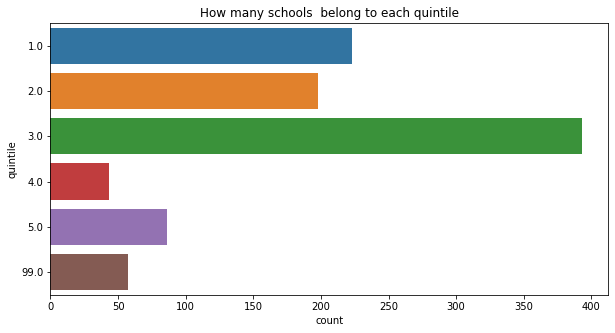

In [102]:
# o	How many schools  belong to each quintile.
fig =plt.figure(figsize=(10,5))
sns.countplot(y='quintile', data=df)
plt.title("How many schools  belong to each quintile")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(2, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(3, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'BETHEL COLLEGE HIGH SCHOOL'),
  Text(5, 0, 'BUTTERWORTH REVIVAL CHRISTIAN SCHOOL'),
  Text(6, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(7, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(8, 0, 'ELUKHANYISWENI COLLEGE'),
  Text(9, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL')])

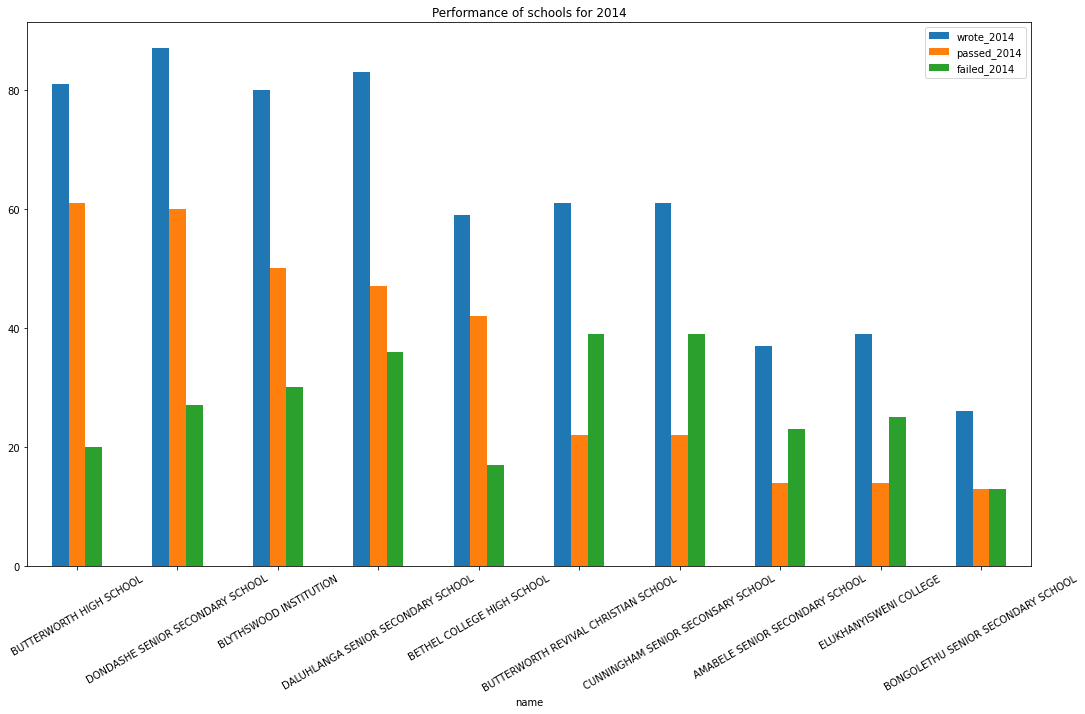

In [103]:
# Performance of schools for each year
name_wrote2014.iloc[:10,].sort_values(by='passed_2014', ascending=False).plot(kind='bar',x='name',figsize=(18,10),title='Performance of schools for 2014')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(2, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(3, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'BETHEL COLLEGE HIGH SCHOOL'),
  Text(5, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(6, 0, 'BUTTERWORTH REVIVAL CHRISTIAN SCHOOL'),
  Text(7, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(8, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL'),
  Text(9, 0, 'ELUKHANYISWENI COLLEGE')])

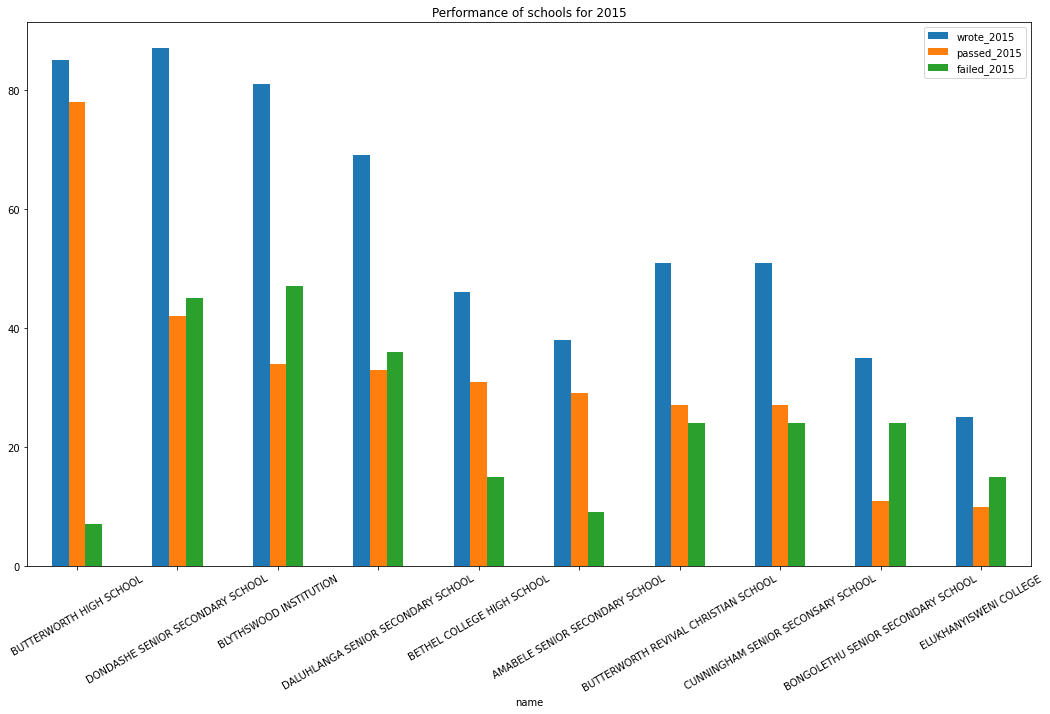

In [110]:
name_wrote2015.iloc[:10,].sort_values(by='passed_2015', ascending=False).plot(kind='bar',x='name',figsize=(18,10),title='Performance of schools for 2015')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(2, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(3, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(5, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(6, 0, 'BETHEL COLLEGE HIGH SCHOOL'),
  Text(7, 0, 'BUTTERWORTH REVIVAL CHRISTIAN SCHOOL'),
  Text(8, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL'),
  Text(9, 0, 'ELUKHANYISWENI COLLEGE')])

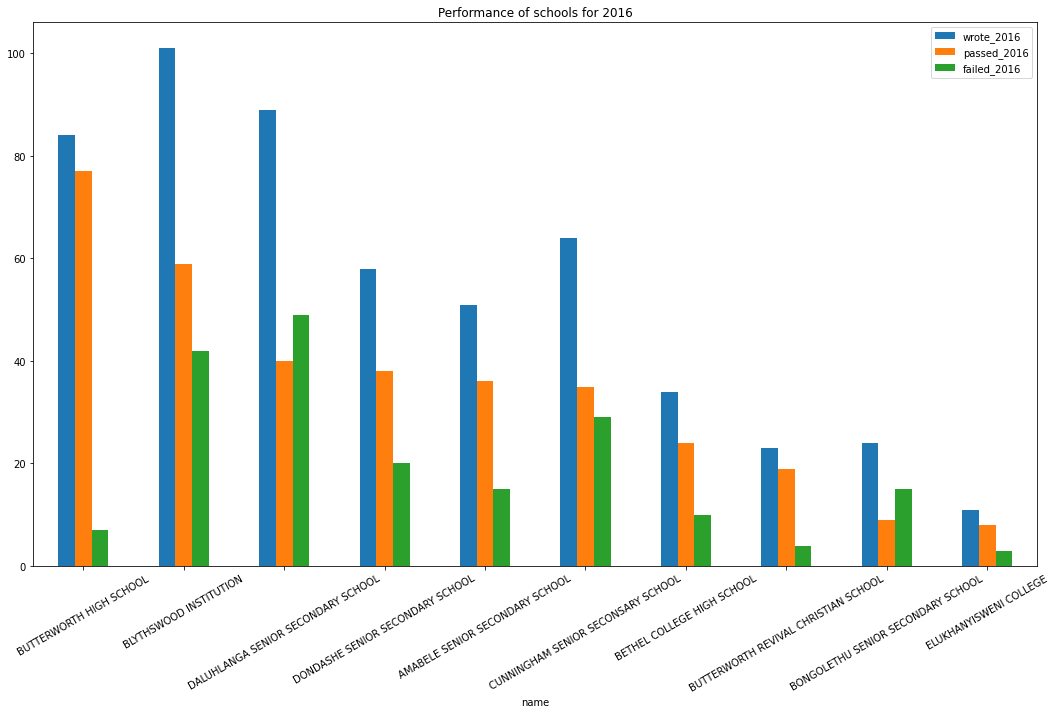

In [116]:
name_wrote2016.iloc[:10,].sort_values(by='passed_2016', ascending=False).plot(kind='bar',x='name',figsize=(18,10),title='Performance of schools for 2016')
plt.xticks(rotation=30)

<AxesSubplot:title={'center':'Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years'}, ylabel='name'>

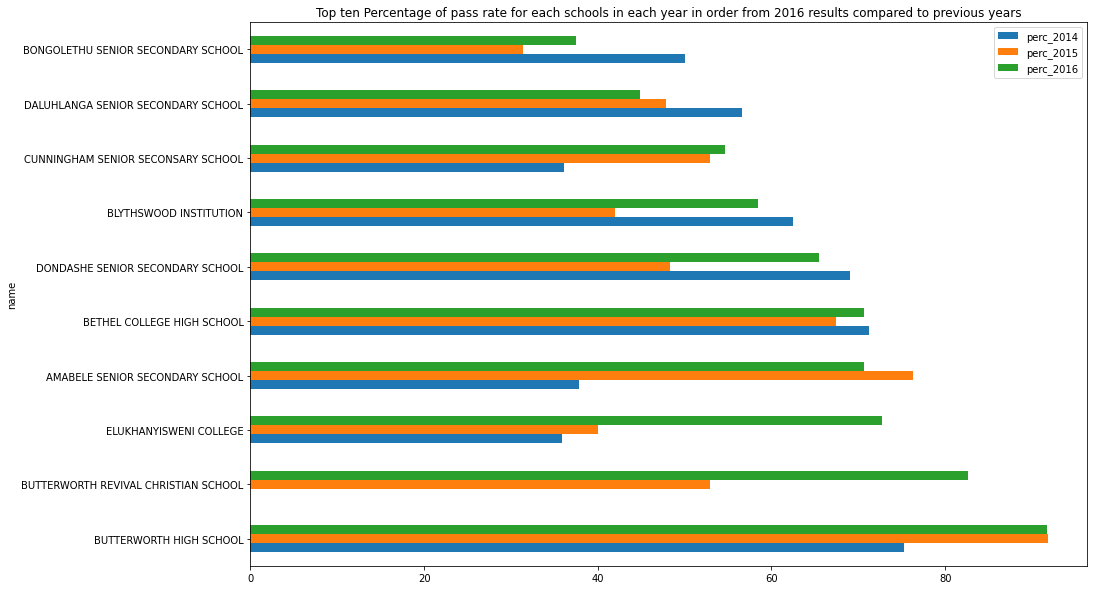

In [117]:
# Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years
perc_rates_of_schools = df.loc[:,['name', 'perc_2014', 'perc_2015','perc_2016']]
perc_rates_of_schools.iloc[:10].sort_values(by='perc_2016', ascending=False).plot.barh(x='name',figsize=(15,10), title='Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years')


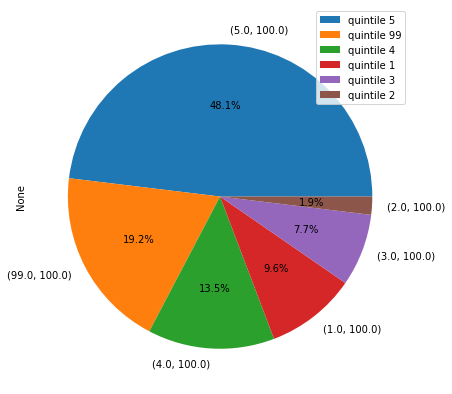

In [118]:
# Most performing quintile for each year.
fig,ax = plt.subplots()
pass_rate_of_100_percent_2014 = quintile_pass_2014_df.value_counts()
x_axis = ['quintile 5','quintile 99','quintile 4','quintile 1','quintile 3','quintile 2']
pass_rate_of_100_percent_2014.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)


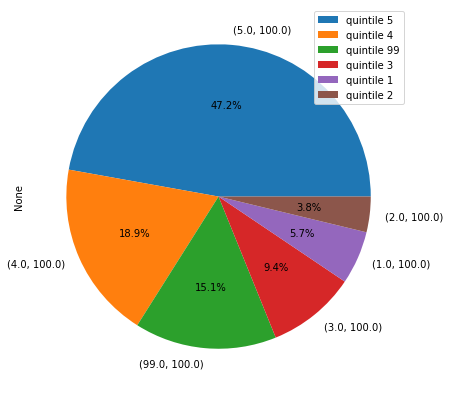

In [119]:
fig,ax = plt.subplots()
pass_rate_of_100_percent_2015 = quintile_pass_2015_df.value_counts()
x_axis = ['quintile 5','quintile 4','quintile 99','quintile 3','quintile 1','quintile 2']
pass_rate_of_100_percent_2015.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)

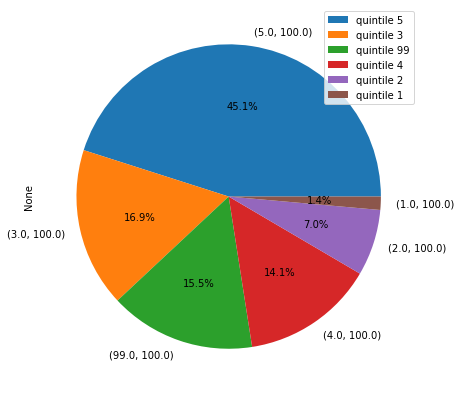

In [120]:
fig,ax = plt.subplots()
pass_rate_of_100_percent_2016 = quintile_pass_2016_df.value_counts()
x_axis = ['quintile 5','quintile 3','quintile 99','quintile 4','quintile 2','quintile 1']
pass_rate_of_100_percent_2016.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)

References:

imputing data retreived 08/12/2021 from https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

imputation, mean ,mode and median retrieved 08/12/2021 from https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

pie chart retrieved 08/12/2021 from https://datascienceparichay.com/article/create-a-pie-chart-of-pandas-series-values/

subtracting columns retrieved 08/12/2021 from https://www.delftstack.com/howto/python-pandas/pandas-subtract-two-columns/

selecting rows based on multiple columns retrieved 08/12/2021 from https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/

